In [1]:
import pandas as pd

sales_df = pd.read_csv(r'C:\Users\ASUS\Documents\Dynamic_pricing_engine\data\raw\mobile_sales_2024.csv')
behavior_df = pd.read_csv(r'C:\Users\ASUS\Documents\Dynamic_pricing_engine\data\raw\customer_behavior_2024.csv')
competitor_df = pd.read_csv(r'C:\Users\ASUS\Documents\Dynamic_pricing_engine\data\raw\competitor_prices_2024.csv')


In [2]:
sales_behavior_df = pd.merge(sales_df, behavior_df, on=['date', 'product_id'], how='inner')

# Merge with competitor prices on 'date' and 'product_id'
df = pd.merge(sales_behavior_df, competitor_df, on=['date', 'product_id'], how='inner')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract datetime features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Handle missing values (you can change strategy here if needed)
df.fillna(0, inplace=True)

# Drop duplicate product name columns if present
df.drop(columns=['product_name_x', 'product_name_y'], errors='ignore', inplace=True)

# Save final preprocessed dataset to CSV
df.to_csv("final_preprocessed_dataset.csv", index=False)

print("✅ Merge complete. File saved as 'final_preprocessed_dataset.csv'")


✅ Merge complete. File saved as 'final_preprocessed_dataset.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\ASUS\Documents\Dynamic_pricing_engine\data\preprocessing\final_preprocessed_dataset.csv')


In [4]:
print(df.head())

         date product_id    brand storage_variant category  price  units_sold  \
0  2024-01-01       M100  Samsung            64GB   Mobile  13648          18   
1  2024-01-01       M101  Samsung           128GB   Mobile  18024           7   
2  2024-01-01       M102    Redmi           128GB   Mobile  27870          28   
3  2024-01-01       M103    Redmi            64GB   Mobile  11041          14   
4  2024-01-01       M104   Realme           128GB   Mobile  15860           2   

   revenue  stock  discount  ...  clicks  add_to_cart  purchases  bounce_rate  \
0   245664    124         0  ...      75           15         18        66.62   
1   126168     47         0  ...      35            8          7        61.85   
2   780360    105         0  ...      72           32         28        78.58   
3   154574     41         0  ...      84           64         14        72.94   
4    31720    107        10  ...       4            0          2        33.67   

   flipkart_price  amazon_

In [5]:
print(df.tail())

            date product_id    brand storage_variant category  price  \
7315  2024-12-31       M115     Oppo           128GB   Mobile  16778   
7316  2024-12-31       M116     Poco           256GB   Mobile  19845   
7317  2024-12-31       M117     Poco           128GB   Mobile  25669   
7318  2024-12-31       M118  Infinix           128GB   Mobile  26957   
7319  2024-12-31       M119    Tecno            64GB   Mobile  14142   

      units_sold  revenue  stock  discount  ...  clicks  add_to_cart  \
7315           5    83890    100         5  ...      32            8   
7316           6   119070     68        10  ...      30           20   
7317          34   872746    134         5  ...     205           66   
7318           4   107828     34        10  ...      10            4   
7319          11   155562     90         5  ...      24            6   

      purchases  bounce_rate  flipkart_price  amazon_price  myntra_price  \
7315          5        46.62           17907         18343

In [6]:
df.describe()

,price,units_sold,revenue,stock,discount,views,clicks,add_to_cart,purchases,bounce_rate,flipkart_price,amazon_price,myntra_price,day_of_week,month,is_weekend
count,7320.000000,7320.000000,7.320000e+03,7320.000000,7320.000000,7320.00000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000
mean,18835.485109,20.832787,3.907046e+05,89.947268,5.414617,419.86653,104.432650,51.967213,20.832787,50.093020,19309.625683,19023.587978,18831.830191,2.986339,6.513661,0.284153
std,5539.834737,11.988491,2.571923e+05,34.873416,4.987574,281.46157,81.716794,46.782964,11.988491,17.311581,5739.111113,5730.833695,5609.577044,2.003503,3.451470,0.451041
min,7162.000000,1.000000,9.060000e+03,30.000000,0.000000,10.00000,1.000000,0.000000,1.000000,20.010000,7356.000000,7076.000000,7254.000000,0.000000,1.000000,0.000000
25%,14018.500000,11.000000,1.810375e+05,60.000000,0.000000,195.00000,42.000000,18.000000,11.000000,35.317500,14373.000000,14135.750000,14028.750000,1.000000,4.000000,0.000000
50%,18693.500000,21.000000,3.570300e+05,90.000000,5.000000,376.00000,85.000000,38.000000,21.000000,50.165000,19129.500000,18814.500000,18671.000000,3.000000,7.000000,0.000000
75%,23532.000000,31.000000,5.587898e+05,120.250000,10.000000,600.00000,147.000000,72.000000,31.000000,65.150000,24137.000000,23699.750000,23467.000000,5.000000,10.000000,1.000000
max,29977.000000,69.000000,1.693944e+06,150.000000,30.000000,1962.00000,719.000000,359.000000,69.000000,79.990000,32823.000000,33209.000000,32242.000000,6.000000,12.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             7320 non-null   object 
 1   product_id       7320 non-null   object 
 2   brand            7320 non-null   object 
 3   storage_variant  7320 non-null   object 
 4   category         7320 non-null   object 
 5   price            7320 non-null   int64  
 6   units_sold       7320 non-null   int64  
 7   revenue          7320 non-null   int64  
 8   stock            7320 non-null   int64  
 9   discount         7320 non-null   int64  
 10  views            7320 non-null   int64  
 11  clicks           7320 non-null   int64  
 12  add_to_cart      7320 non-null   int64  
 13  purchases        7320 non-null   int64  
 14  bounce_rate      7320 non-null   float64
 15  flipkart_price   7320 non-null   int64  
 16  amazon_price     7320 non-null   int64  
 17  myntra_price  

In [8]:
df.isnull().sum()

date               0
product_id         0
brand              0
storage_variant    0
category           0
price              0
units_sold         0
revenue            0
stock              0
discount           0
views              0
clicks             0
add_to_cart        0
purchases          0
bounce_rate        0
flipkart_price     0
amazon_price       0
myntra_price       0
day_of_week        0
month              0
is_weekend         0
dtype: int64

In [9]:
df.columns

Index(['date', 'product_id', 'brand', 'storage_variant', 'category', 'price',
       'units_sold', 'revenue', 'stock', 'discount', 'views', 'clicks',
       'add_to_cart', 'purchases', 'bounce_rate', 'flipkart_price',
       'amazon_price', 'myntra_price', 'day_of_week', 'month', 'is_weekend'],
      dtype='object')

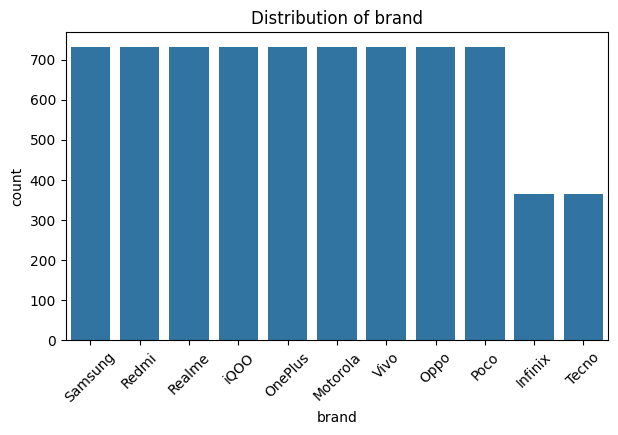

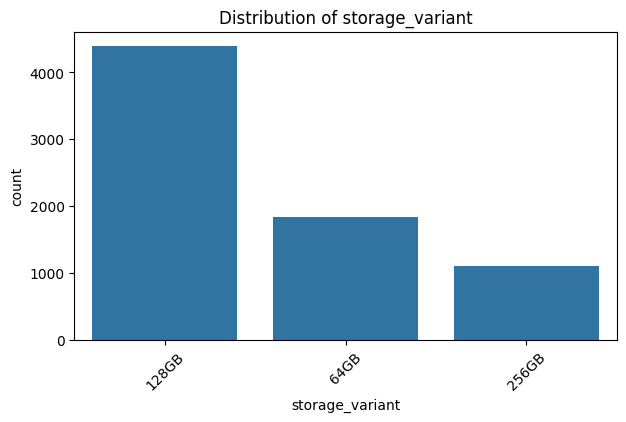

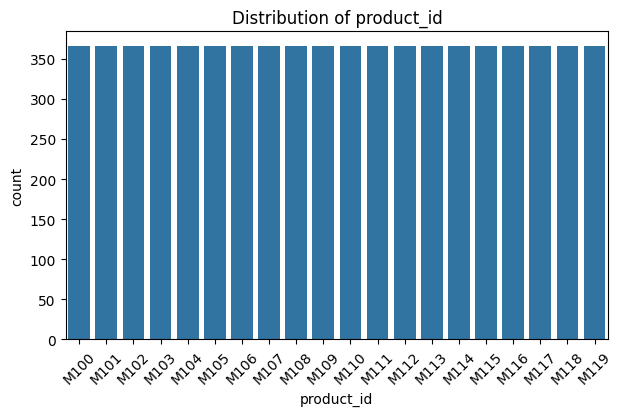

In [10]:
cat_cols = ['brand', 'storage_variant', 'product_id']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

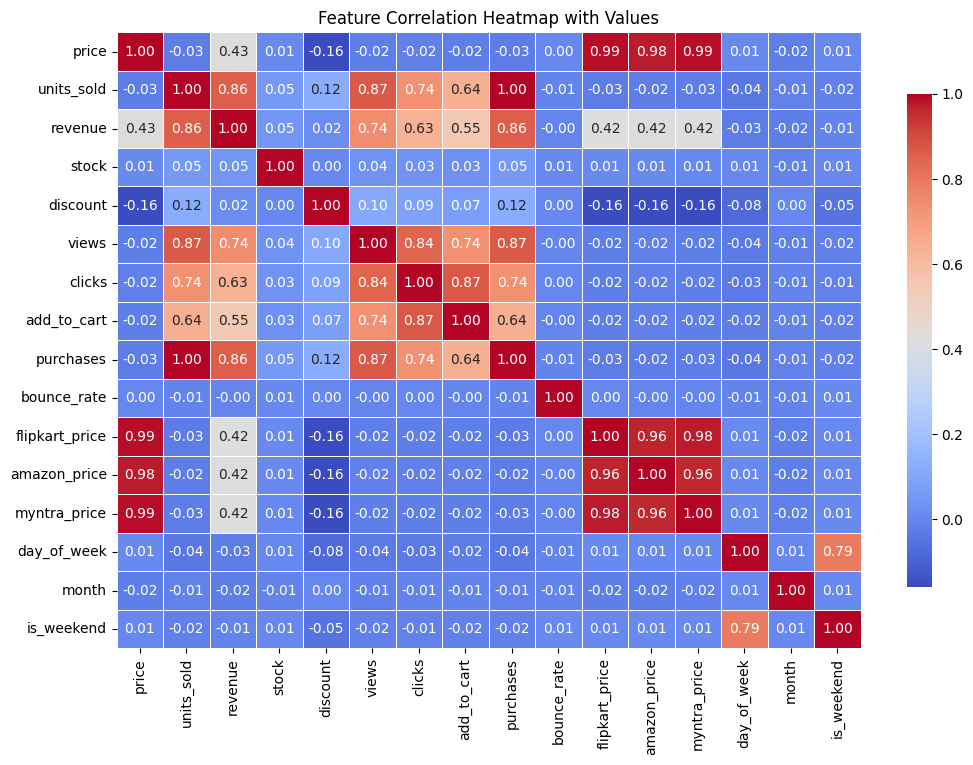

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr(numeric_only=True), 
    cmap="coolwarm", 
    annot=True,       # ✅ show numbers
    fmt=".2f",        # ✅ round to 2 decimal places
    linewidths=0.5,   # ✅ add grid lines for clarity
    cbar_kws={"shrink": 0.8}  # ✅ smaller colorbar
)
plt.title("Feature Correlation Heatmap with Values")
plt.show()


In [12]:
print(df.columns)


Index(['date', 'product_id', 'brand', 'storage_variant', 'category', 'price',
       'units_sold', 'revenue', 'stock', 'discount', 'views', 'clicks',
       'add_to_cart', 'purchases', 'bounce_rate', 'flipkart_price',
       'amazon_price', 'myntra_price', 'day_of_week', 'month', 'is_weekend'],
      dtype='object')


In [13]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['brand', 'storage_variant', 'product_id']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[cat_cols])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             7320 non-null   object 
 1   product_id       7320 non-null   object 
 2   brand            7320 non-null   object 
 3   storage_variant  7320 non-null   object 
 4   category         7320 non-null   object 
 5   price            7320 non-null   int64  
 6   units_sold       7320 non-null   int64  
 7   revenue          7320 non-null   int64  
 8   stock            7320 non-null   int64  
 9   discount         7320 non-null   int64  
 10  views            7320 non-null   int64  
 11  clicks           7320 non-null   int64  
 12  add_to_cart      7320 non-null   int64  
 13  purchases        7320 non-null   int64  
 14  bounce_rate      7320 non-null   float64
 15  flipkart_price   7320 non-null   int64  
 16  amazon_price     7320 non-null   int64  
 17  myntra_price  

In [15]:
# Ensure 'date' column is datetime type
df["date"] = pd.to_datetime(df["date"])

df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)

X = df.drop(["price", "date"], axis=1)
y = df["price"]



In [16]:
df.columns

Index(['date', 'product_id', 'brand', 'storage_variant', 'category', 'price',
       'units_sold', 'revenue', 'stock', 'discount', 'views', 'clicks',
       'add_to_cart', 'purchases', 'bounce_rate', 'flipkart_price',
       'amazon_price', 'myntra_price', 'day_of_week', 'month', 'is_weekend',
       'day'],
      dtype='object')

In [17]:
# 1. Load dataset
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import xgboost as xgb
import joblib  # for saving model

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Documents\Dynamic_pricing_engine\notebooks\final_preprocessed_dataset.csv")
df["date"] = pd.to_datetime(df["date"])

# 2. Encode categorical columns
categorical_cols = ["product_id", "brand", "storage_variant", "category"]
for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes

# 3. Add stronger noise to price and units_sold for realism
np.random.seed(42)
df["price"] = df["price"] * (1 + np.random.uniform(-0.15, 0.15, len(df)))       # ±15% noise
df["units_sold"] = (df["units_sold"] * (1 + np.random.uniform(-0.20, 0.20, len(df)))).astype(int)  # ±20% noise

# 4. Define lag & rolling features
def add_lag_features(df, target_col="price", lags=[1, 7]):
    df = df.sort_values(["product_id", "date"])
    for lag in lags:
        df[f"{target_col}_lag{lag}"] = df.groupby("product_id")[target_col].shift(lag)
        df[f"{target_col}_rolling{lag}"] = df.groupby("product_id")[target_col].shift(1).rolling(lag).mean()
    df = df.dropna().reset_index(drop=True)
    return df

df = add_lag_features(df)

# 5. Competitor price lags
competitor_cols = ["flipkart_price", "amazon_price", "myntra_price"]
for col in competitor_cols:
    for lag in [1, 7]:
        df[f"{col}_lag{lag}"] = df.groupby("product_id")[col].shift(lag)
df = df.dropna().reset_index(drop=True)

# 6. Train/test split
train = df[df["date"] < "2024-10-01"]
test  = df[df["date"] >= "2024-10-01"]

X_train = train.drop(["price", "date"], axis=1)
y_train = train["price"]
X_test = test.drop(["price", "date"], axis=1)
y_test = test["price"]

# 7. Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 8. XGBoost parameters (simpler model, stronger regularization)
params = {
    "objective": "reg:squarederror",
    "max_depth": 3,             # shallower trees
    "learning_rate": 0.05,
    "subsample": 0.6,           # row subsampling
    "colsample_bytree": 0.6,    # feature subsampling
    "alpha": 4,                 # L1 regularization
    "lambda": 6,                # L2 regularization
    "seed": 42
}

# 9. Train with early stopping
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtest, "eval")],
    early_stopping_rounds=50,
    verbose_eval=20
)

# 10. Predict & evaluate
preds = model.predict(dtest)
print("R2 Score:", r2_score(y_test, preds))

# 11. Save the trained model
model.save_model(r"C:\Users\ASUS\Documents\Dynamic_pricing_engine\notebooks\xgb_price_model.json")
print("✅ Model saved as 'xgb_price_model.json'")

# Optional: save using joblib (can load as sklearn-style)
joblib.dump(model, r"C:\Users\ASUS\Documents\Dynamic_pricing_engine\notebooks\xgb_price_model.pkl")
print("✅ Model also saved as 'xgb_price_model.pkl'")


[0]	eval-rmse:5645.80797
[20]	eval-rmse:2713.47441
[40]	eval-rmse:2027.18586
[60]	eval-rmse:1845.97580
[80]	eval-rmse:1818.35893
[100]	eval-rmse:1814.66104
[120]	eval-rmse:1816.44323
[140]	eval-rmse:1816.21510
[155]	eval-rmse:1817.50760
R2 Score: 0.9050974708723502
✅ Model saved as 'xgb_price_model.json'
✅ Model also saved as 'xgb_price_model.pkl'


In [19]:
def clean_before_save(df):
    # Drop rows with any nulls in lag/rolling columns
    lag_cols = [
        "price_lag1", "price_rolling1", "price_lag7", "price_rolling7",
        "flipkart_price_lag1", "flipkart_price_lag7",
        "amazon_price_lag1", "amazon_price_lag7",
        "myntra_price_lag1", "myntra_price_lag7"
    ]
    df = df.dropna(subset=lag_cols)
    return df
df = clean_before_save(df)
    


In [23]:
# =========================================
# Preprocessing Pipeline for Price Prediction
# =========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# -----------------------------
# 1. Load your dataset
# -----------------------------
# Example: reading from CSV
# data = pd.read_csv("final_dataset.csv")

# -----------------------------
# 2. Handle missing values
# -----------------------------
numeric_cols = ['units_sold','revenue','stock','discount',
                'views','clicks','add_to_cart','purchases','bounce_rate',
                'flipkart_price','amazon_price','myntra_price']

categorical_cols = ['brand','storage_variant','category']

# Fill numeric NaNs with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical NaNs with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# -----------------------------
# 3. Feature Engineering
# -----------------------------
# Date features
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

# Festival feature (example)
festival_dates = ['2024-01-15','2024-03-25','2024-04-10','2024-06-17','2024-08-19',
                  '2024-08-26','2024-09-07','2024-10-03','2024-10-12','2024-11-01','2024-12-25']
df['is_festival_day'] = df['date'].isin(pd.to_datetime(festival_dates)).astype(int)

# Derived features (optional but helpful)
df['discount_pct'] = df['discount'] / (df['price'] + 1e-5)
df['click_through_rate'] = df['clicks'] / (df['views'] + 1e-5)
df['add_to_cart_rate'] = df['add_to_cart'] / (df['views'] + 1e-5)

# -----------------------------
# 4. Encode categorical features
# -----------------------------
encoder = TargetEncoder(cols=['brand','storage_variant','category'])
# Target is 'price'
df[['brand_encoded','storage_encoded','category_encoded']] = encoder.fit_transform(
    df[['brand','storage_variant','category']], df['price']
)

# Drop original categorical columns
data = df.drop(['brand','storage_variant','category','date'], axis=1)

# -----------------------------
# 5. Scale numeric features (optional)
# -----------------------------
scaler = StandardScaler()
scaled_cols = ['units_sold','revenue','stock','discount',
               'views','clicks','add_to_cart','purchases','bounce_rate',
               'flipkart_price','amazon_price','myntra_price',
               'discount_pct','click_through_rate','add_to_cart_rate']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

# -----------------------------
# 6. Select Features for XGBoost
# -----------------------------
features = ['units_sold','stock','discount','views','clicks','add_to_cart',
            'purchases','bounce_rate','flipkart_price','amazon_price','myntra_price',
            'day_of_week','month','is_weekend','is_festival_day',
            'brand_encoded','storage_encoded','category_encoded',
            'discount_pct','click_through_rate','add_to_cart_rate']

X = data[features]
y = data['price']

print("Preprocessing complete!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Preprocessing complete!
Features shape: (7040, 21)
Target shape: (7040,)


In [25]:
df.columns

Index(['date', 'product_id', 'brand', 'storage_variant', 'category', 'price',
       'units_sold', 'revenue', 'stock', 'discount', 'views', 'clicks',
       'add_to_cart', 'purchases', 'bounce_rate', 'flipkart_price',
       'amazon_price', 'myntra_price', 'day_of_week', 'month', 'is_weekend',
       'price_lag1', 'price_rolling1', 'price_lag7', 'price_rolling7',
       'flipkart_price_lag1', 'flipkart_price_lag7', 'amazon_price_lag1',
       'amazon_price_lag7', 'myntra_price_lag1', 'myntra_price_lag7',
       'is_festival_day', 'discount_pct', 'click_through_rate',
       'add_to_cart_rate', 'brand_encoded', 'storage_encoded',
       'category_encoded'],
      dtype='object')